In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [28]:
data = pd.read_csv('Housing.csv')



In [30]:
data = pd.get_dummies(data, drop_first=True)



In [32]:
print("Data Sample:")
print(data.head())



Data Sample:
      price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  13300000  7420         4          2        3        2          True   
1  12250000  8960         4          4        4        3          True   
2  12250000  9960         3          2        2        2          True   
3  12215000  7500         4          2        2        3          True   
4  11410000  7420         4          1        2        2          True   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0          False         False                False                 True   
1          False         False                False                 True   
2          False          True                False                False   
3          False          True                False                 True   
4           True          True                False                 True   

   prefarea_yes  furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0   

In [34]:
X = data.drop('price', axis=1)
y = data['price']



In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [38]:
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [40]:
y_pred = model.predict(X_test)



In [42]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluation Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R^2: {r2:.2f}")




Evaluation Metrics:
MAE: 970043.40
MSE: 1754318687330.66
R^2: 0.65



Model Coefficients:
                            Feature   Coefficient
0                              area  2.359688e+02
1                          bedrooms  7.677870e+04
2                         bathrooms  1.094445e+06
3                           stories  4.074766e+05
4                           parking  2.248419e+05
5                      mainroad_yes  3.679199e+05
6                     guestroom_yes  2.316100e+05
7                      basement_yes  3.902512e+05
8               hotwaterheating_yes  6.846499e+05
9               airconditioning_yes  7.914267e+05
10                     prefarea_yes  6.298906e+05
11  furnishingstatus_semi-furnished -1.268818e+05
12     furnishingstatus_unfurnished -4.136451e+05


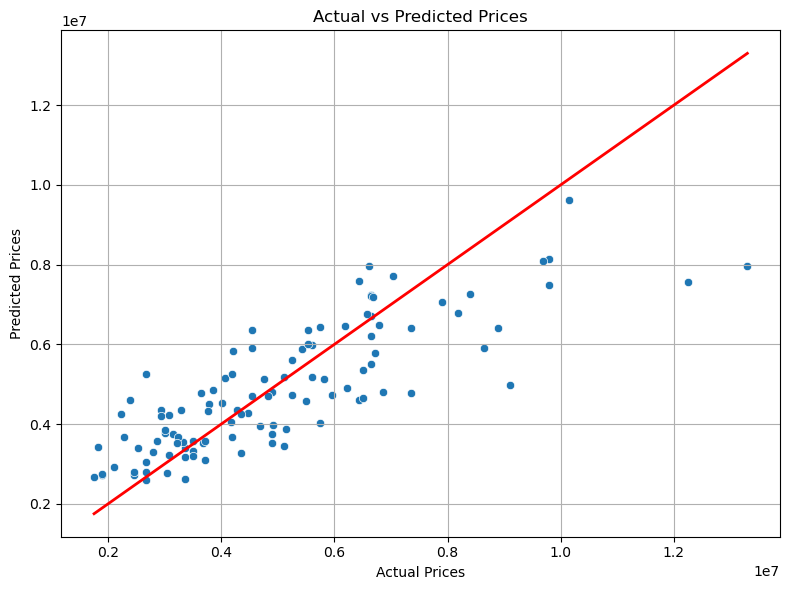

In [44]:
coeff_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nModel Coefficients:")
print(coeff_df)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.grid(True)
plt.tight_layout()
plt.show()
